In [6]:
import pandas as pd

train_csv = pd.read_csv('train.csv')

df = pd.DataFrame(train_csv)

array([[<AxesSubplot: title={'center': 'Id'}>,
        <AxesSubplot: title={'center': 'MSSubClass'}>,
        <AxesSubplot: title={'center': 'LotFrontage'}>,
        <AxesSubplot: title={'center': 'LotArea'}>,
        <AxesSubplot: title={'center': 'OverallQual'}>,
        <AxesSubplot: title={'center': 'OverallCond'}>],
       [<AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'YearRemodAdd'}>,
        <AxesSubplot: title={'center': 'MasVnrArea'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF1'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF2'}>,
        <AxesSubplot: title={'center': 'BsmtUnfSF'}>],
       [<AxesSubplot: title={'center': 'TotalBsmtSF'}>,
        <AxesSubplot: title={'center': '1stFlrSF'}>,
        <AxesSubplot: title={'center': '2ndFlrSF'}>,
        <AxesSubplot: title={'center': 'LowQualFinSF'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'BsmtFullBath'}>],
       [<AxesSu

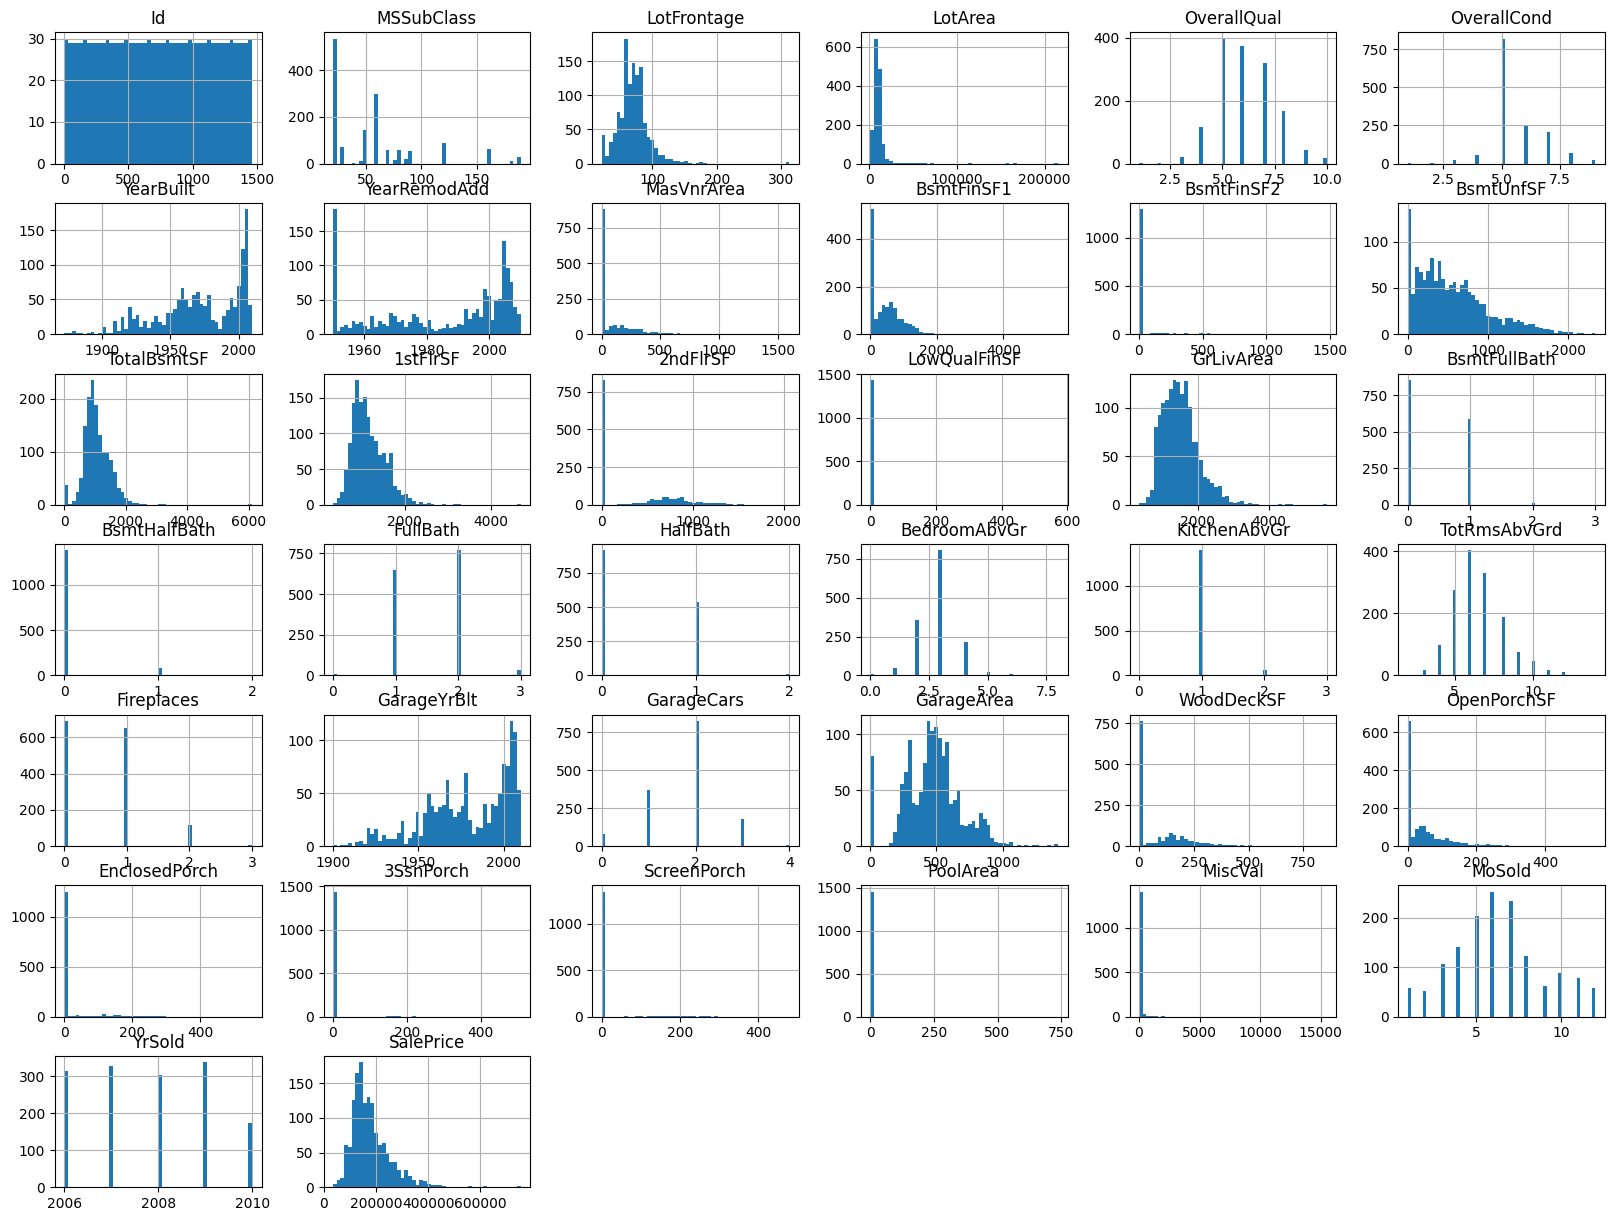

In [7]:
df.hist(bins=50, figsize=(20,15))

<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

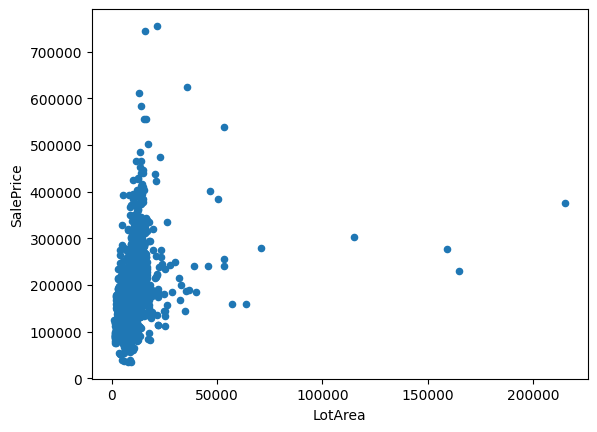

In [8]:
df.plot.scatter(x='LotArea', y='SalePrice')

In [9]:
ds = df.loc[df['SalePrice'] < 500000]
ds = ds.loc[df['LotArea'] < 50000]
ds

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

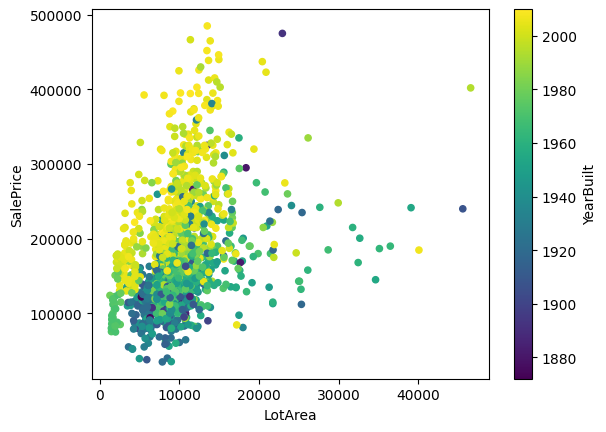

In [10]:
ds.plot.scatter(x='LotArea', y='SalePrice', c='YearBuilt', colormap='viridis')

In [11]:
ds = df.loc[df['SalePrice'] <= 300000]
ds = ds.loc[df['LotArea'] <= 20000]

<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

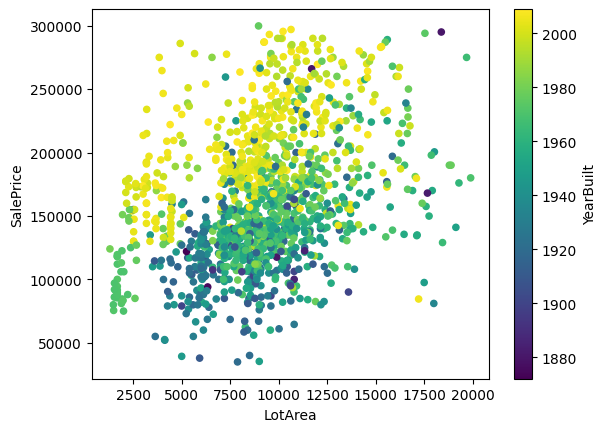

In [12]:
ds.plot.scatter(x='LotArea', y='SalePrice', c='YearBuilt', colormap='viridis')

<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

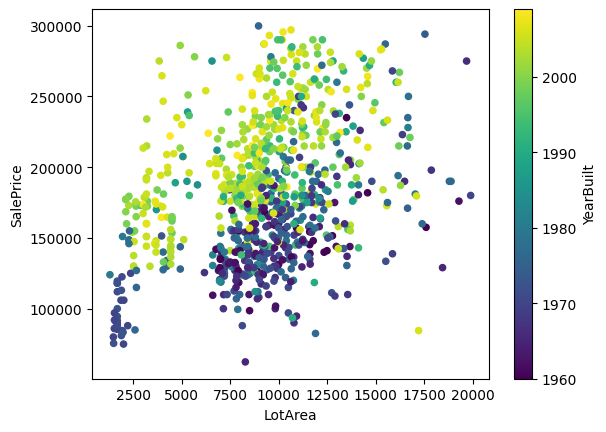

In [13]:
dd = ds.loc[df['YearBuilt'] >= 1960]

dd.plot.scatter(x='LotArea', y='SalePrice', c='YearBuilt', colormap='viridis')

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
X = df[['LotArea', 'GarageArea', 'BedroomAbvGr']].copy()
y = df['SalePrice']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)


In [29]:
#ROOT MEAN SQUARED ERROR
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSE:  63696.18873209081


In [ ]:
test = pd.DataFrame({'Predicted sale price':y_pred, 'Actual sale price':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[200:250])
plt.legend(['Actual sale price','Predicted sale price'])